<a href="https://colab.research.google.com/github/yusufbaykal/Patika.dev/blob/main/Elma_A%C4%9Fa%C3%A7lar%C4%B1ndaki_Yaprak_Hastal%C4%B1klar%C4%B1n%C4%B1n_Belirlenmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kütüphanelerin Kurulumu**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import History

**Kaggle**

In [2]:
!pip install kaggle

In [3]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yusufbaykal","key":"24fa82c7845465cfe17017dc710727c7"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c plant-pathology-2020-fgvc7

**Modeling**

In [6]:
train_csv = pd.read_csv("/content/train.csv")
train_csv.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [7]:
test_csv = pd.read_csv("/content/test.csv")
test_csv.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


(1365, 2048, 3)


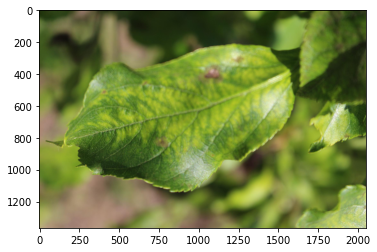

In [8]:
image = plt.imread('//content/drive/MyDrive/images/Train_0.jpg')
plt.imshow(image)
print(image.shape)

In [9]:
def image_resize(img, size = (None, None), ratio=3):
    if size[0] is None:
        resize_ratio = ratio
        resize_height = int(img.shape[0]/resize_ratio)
        resize_width = int(img.shape[1]/resize_ratio)
        print(f"height: {resize_height}, width: {resize_width}")
    else:
        resize_height = size[0]
        resize_width = size[1]

    img_resize = tf.image.resize(img, [resize_height,resize_width]).numpy()
    img_resize = img_resize.astype(np.uint8)
    return(img_resize)

height: 455, width: 682
height: 341, width: 512


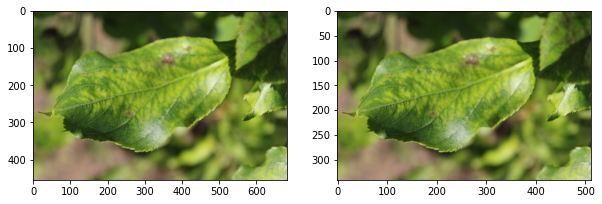

height: 273, width: 409
height: 227, width: 341


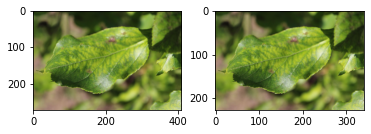

In [10]:
plt.figure(1, figsize=(10,10))
plt.subplot(221)
plt.imshow(image_resize(image, ratio = 3))

plt.subplot(222)
plt.imshow(image_resize(image, ratio = 4))
plt.show()

plt.subplot(223)
plt.imshow(image_resize(image, ratio = 5))

plt.subplot(224)
plt.imshow(image_resize(image, ratio = 6))
plt.show()

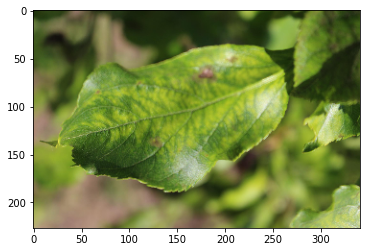

In [11]:
img_height = 227
img_width = 341
plt.imshow(image_resize(image, size=(img_height, img_width)))

In [12]:
train_resized = []

for img_id in train_csv['image_id'].to_list():
    image = plt.imread(f'/content/drive/MyDrive/images/{img_id}.jpg')
    train_resized.append(image_resize(image, (img_height, img_width)))

print(len(train_resized))

test_resized = []

for img_id in test_csv['image_id'].to_list():
    image = plt.imread(f'/content/drive/MyDrive/images/{img_id}.jpg')
    test_resized.append(image_resize(image, (img_height, img_width)))

print(len(test_resized))

1821
1821


In [13]:
x_train = np.ndarray(shape = (len(train_resized), img_height, img_width, 3), dtype=np.float32)
x_test = np.ndarray(shape = (len(test_resized), img_height, img_width, 3), dtype=np.float32)

for i in range(len(train_resized)):
    x_train[i] = img_to_array(train_resized[i])

for i in range(len(test_resized)):
    x_test[i] = img_to_array(test_resized[i])

x_train = x_train/255
x_test = x_test/255

print(x_train.shape)
print(x_test.shape)

(1821, 227, 341, 3)
(1821, 227, 341, 3)


In [14]:
y_train = train_csv.iloc[:,1:]
y_train.head()

,healthy,multiple_diseases,rust,scab
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.applications import InceptionResNetV2

resnet = InceptionResNetV2(weights='imagenet', include_top=False, pooling='avg')

model = Sequential()
model.add(resnet)
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.layers[0].trainable = False

model.summary()

219062272/219055592 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 1536)              54336736  
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 54,541,988
Trainable params: 205,252
Non-trainable params: 54,336,736
_________________________________________________________________


In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics='accuracy')

In [17]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, test_size = 0.2)

print(train_x.shape)
print(train_y.shape)

print(val_x.shape)
print(val_y.shape)

(1456, 227, 341, 3)
(1456, 4)
(365, 227, 341, 3)
(365, 4)


In [18]:
ımagedata = ImageDataGenerator(rotation_range=25,
                             shear_range=.20,
                             zoom_range=.20,
                             width_shift_range=.20,
                             height_shift_range=.20,
                             horizontal_flip=True,
                             vertical_flip=True
                            )


batch_size = 24
ımagedata_without_aug = ImageDataGenerator()

train_ımagedata = ımagedata_without_aug.flow(train_x, train_y, batch_size=batch_size)

val_ımagedata = ımagedata_without_aug.flow(val_x, val_y, batch_size=batch_size)

In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit_generator(train_ımagedata, 
                              epochs=8,
                              steps_per_epoch=train_x.shape[0]//batch_size,
                              validation_data = val_ımagedata,
                              validation_steps = val_x.shape[0]//batch_size,
                              callbacks = [callback]
                   )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
60/60 [==============================] - 584s 10s/step - loss: 0.3228 - accuracy: 0.8792 - val_loss: 0.5668 - val_accuracy: 0.8278
Epoch 2/8
60/60 [==============================] - 583s 10s/step - loss: 0.3078 - accuracy: 0.8869 - val_loss: 0.5840 - val_accuracy: 0.8250
Epoch 3/8
60/60 [==============================] - 585s 10s/step - loss: 0.2725 - accuracy: 0.8966 - val_loss: 0.5756 - val_accuracy: 0.8194
Epoch 4/8
60/60 [==============================] - 585s 10s/step - loss: 0.2796 - accuracy: 0.9022 - val_loss: 0.5479 - val_accuracy: 0.8444
Epoch 5/8
60/60 [==============================] - 587s 10s/step - loss: 0.2628 - accuracy: 0.9064 - val_loss: 0.6754 - val_accuracy: 0.8306
Epoch 6/8
60/60 [==============================] - 586s 10s/step - loss: 0.2620 - accuracy: 0.9071 - val_loss: 0.6152 - val_accuracy: 0.8472
Epoch 7/8
60/60 [==============================] - 586s 10s/step - loss: 0.2258 - accuracy: 0.9197 - val_loss: 0.6288 - val_accuracy: 0.8194
Epoch 8/8
60/

In [21]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.322831,0.879190,0.566831,0.827778
1,0.307766,0.886872,0.583982,0.825000
2,0.272492,0.896648,0.575573,0.819444
3,0.279551,0.902235,0.547922,0.844444
4,0.262828,0.906425,0.675422,0.830556
